## 1. 문제 정의
### 자전거 대여 수요 예측 : 과거 사용 패턴과 날씨 데이터를 결합할 것
test 데이터의 count를 예측한다.

분류와 예측 중 **예측** , *회귀*

## 2. 데이터 수집

In [2]:
train = pd.read_csv("C:/Users/admin/Desktop/AI BigData/[study] kaggle/bike/train.csv", parse_dates=['datetime'])
train.shape

(10886, 12)

* datetime : 날짜 + 시간 단위
* season : 1(봄), 2(여름), 3(가을), 4(겨울)
* holiday : 휴일 여부
* workingday : 휴일도 주말도 아닌 날의 여부 : 0(휴일)
* weather : 1(맑음, 구름 조금), 2(습함, 구름), 3(약한 비/눈) 4(강한 눈/비)
* temp : 섭씨온도
* atemp : 체감상 온도 ?
* humidity : 상대 습도
* windspeed : 풍속
* casual : 미등록 사용자의 대여 수
* registered : 등록된 사용자의 대여 수
* count : 전체 대여 수

In [20]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#노트북 안에 그래프 그리기
%matplotlib inline

#그래프에서 격자로 숫자 범위가 눈에 잘 띄도록
plt.style.use('ggplot')

#그래프에서 마이너스 폰트가 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [21]:
#그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [35]:
import warnings
warnings.filterwarnings('ignore')

## 3. 탐색적 자료 분석 및 전처리

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
year          10886 non-null int64
month         10886 non-null int64
day           10886 non-null int64
hour          10886 non-null int64
minute        10886 non-null int64
second        10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(14)
memory usage: 1.5 MB


In [5]:
train.head(15)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


wind speed 가 0인 값이 많다. -> 0으로 채워 넣은 것은 아닌지 의심!

In [23]:
train.temp.describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

In [25]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
year          0
month         0
day           0
hour          0
minute        0
second        0
dtype: int64

In [26]:
#datetime 분리
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second
train.shape

#열 수가 6개 추가됨

(10886, 18)

In [27]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


[Text(0.5, 0, 'hour'), Text(0.5, 1.0, 'rental amount - hour')]

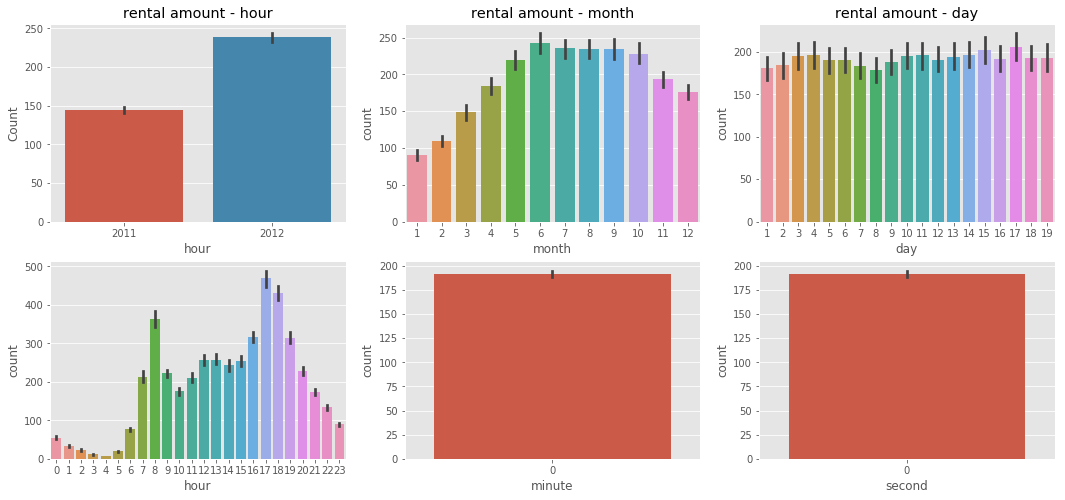

In [33]:
#시간별 대여량 시각화
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,8)

sns.barplot(data=train, x='year', y='count', ax= ax1)
sns.barplot(data=train, x='month', y='count', ax= ax2)
sns.barplot(data=train, x='day', y='count', ax= ax3)
sns.barplot(data=train, x='hour', y='count', ax= ax4)
sns.barplot(data=train, x='minute', y='count', ax= ax5)
sns.barplot(data=train, x='second', y='count', ax= ax6)

ax1.set(ylabel='Count', title='rental amount - year')
ax2.set(xlabel='month', title='rental amount - month')
ax3.set(xlabel='day', title='rental amount - day')
ax1.set(xlabel='hour', title='rental amount - hour')

1. 2011년보다 2012년이 늘어났음 : 홍보가 더 되었을 것이라고 예측
2. month : 따뜻한 계절에 대여량이 많음
3. day : 19일까지만 있음 -> feature로 사용하기엔 어렵다.
4. 시간별 대여량 : 출퇴근 시간에 대여량이 많음
5. 분, 초 : 0으로 기록되어 쓸 수 없는 데이터

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Working Day'),
 Text(0.5, 1.0, 'rental amount - workingday')]

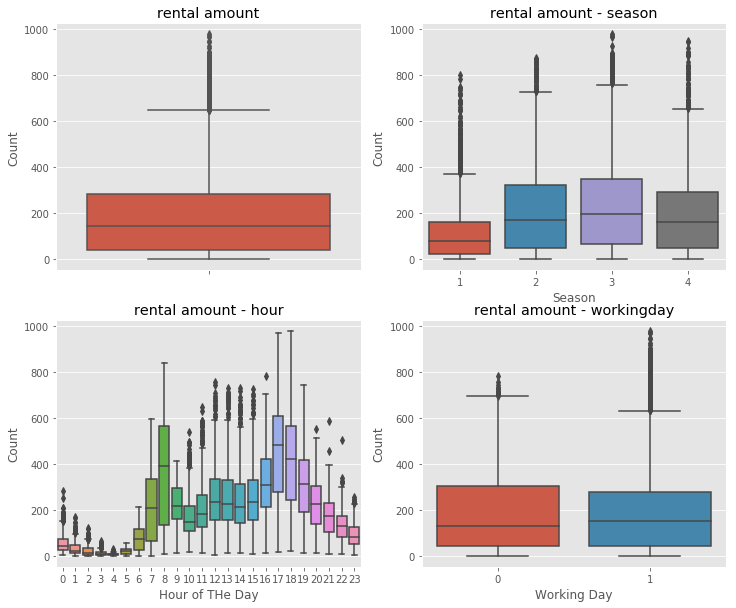

In [37]:
#계절별, 시간별, workingday별 대여량 시각화 : boxplot
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(12, 10)
sns.boxplot(data=train, y='count', orient='v', ax=axes[0][0])
sns.boxplot(data=train, y='count',x='season', orient='v', ax=axes[0][1])
sns.boxplot(data=train, y='count',x='hour', orient='v', ax=axes[1][0])
sns.boxplot(data=train, y='count', x='workingday', orient='v', ax=axes[1][1])

axes[0][0].set(ylabel = 'Count', title='rental amount')
axes[0][1].set(xlabel = 'Season', ylabel='Count', title='rental amount - season')
axes[1][0].set(xlabel = 'Hour of THe Day', ylabel='Count', title='rental amount - hour')
axes[1][1].set(xlabel = 'Working Day', ylabel='Count', title='rental amount - workingday')

1. 대여량이 특정 구간에 몰려있음을 확인
2. 계절별 대여량 : 봄이 가장 적고 가장 많은 것은 가을, 여름
3. 근무일 여부에 따른 대여량 : 큰 차이는 없지만 휴일에 대여량이 많아 보임

In [38]:
train['dayofweek'] = train['datetime'].dt.dayofweek
train.shape

(10886, 19)

In [39]:
train['dayofweek'].value_counts()

#0부터 6 : 월요일 - 일요일

5    1584
6    1579
3    1553
2    1551
0    1551
1    1539
4    1529
Name: dayofweek, dtype: int64

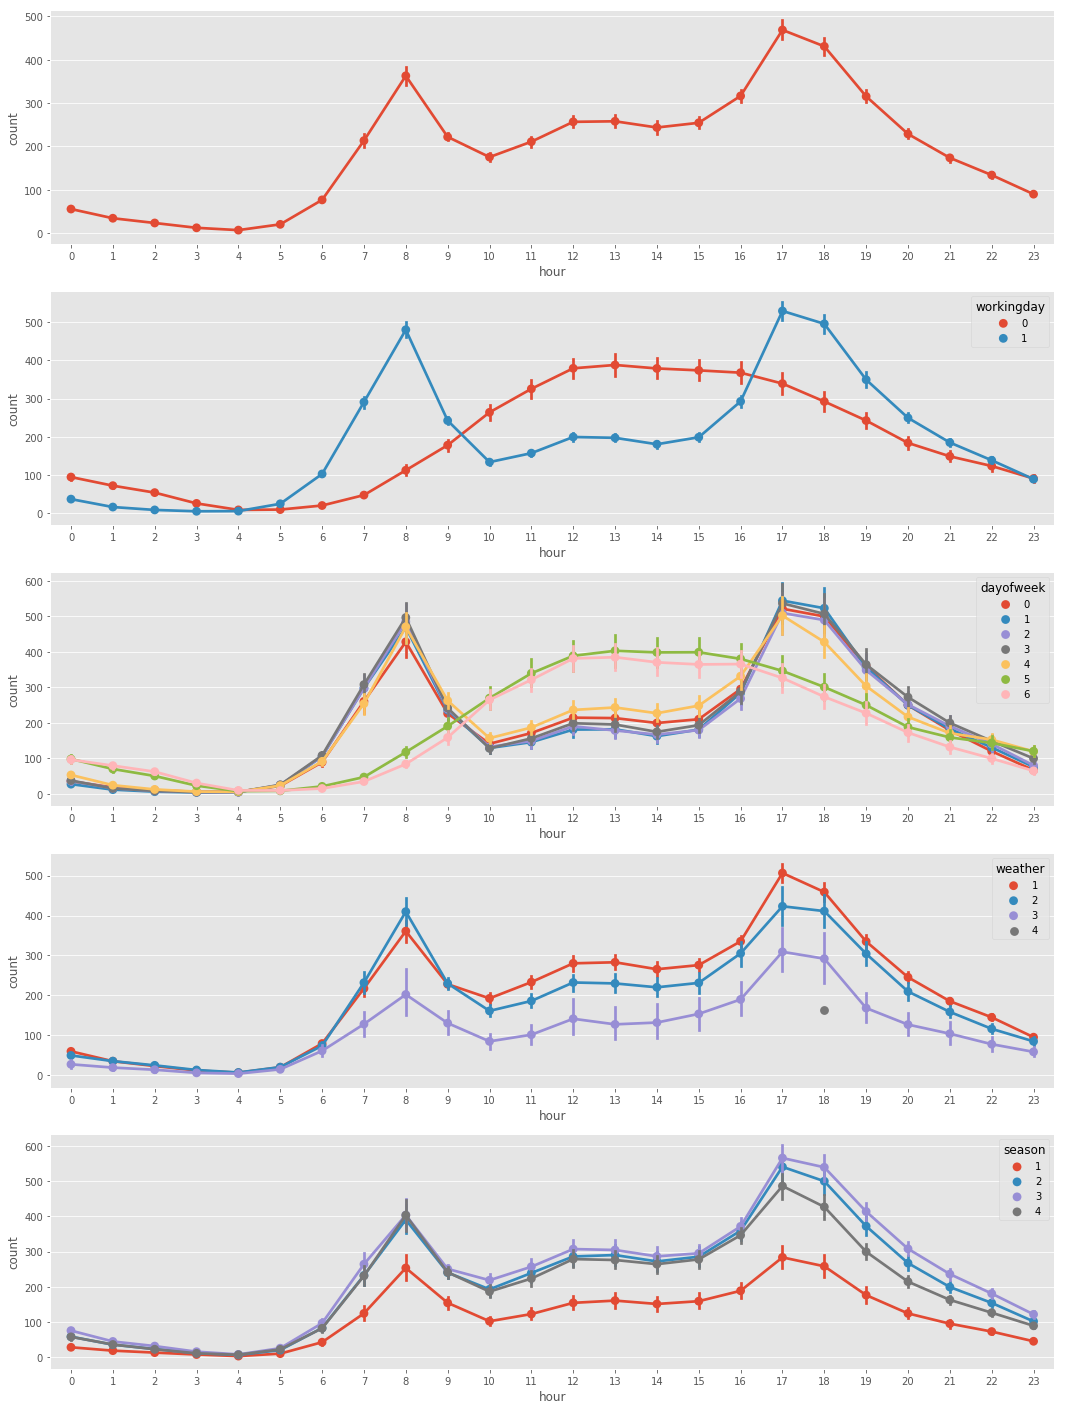

In [40]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=5)
fig.set_size_inches(18,25)

#hue : 나누는 기준
sns.pointplot(data=train, x='hour', y='count', ax=ax1)
sns.pointplot(data=train, x='hour', y='count', hue='workingday', ax=ax2)
sns.pointplot(data=train, x='hour', y='count', hue='dayofweek', ax=ax3)
sns.pointplot(data=train, x='hour', y='count', hue='weather', ax=ax4)
sns.pointplot(data=train, x='hour', y='count', hue='season', ax=ax5)

2. 휴일일때는 점심시간대 많이 빌리고, 휴일이 아닐때는 출퇴근시간에 많이 빌림
4. 날씨가 좋을때 가장 많이 빌린다.